# Dataset

In [1]:
!pip install opendatasets

In [ ]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/cashutosh/gender-classification-dataset/download?datasetVersionNumber=1")

In [3]:
import os
import shutil

def split_dataset(source_dir, dest_dir, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    # Membuat direktori untuk setiap bagian dataset
    for dir_name in ['Training', 'Validation', 'Testing']:
        os.makedirs(os.path.join(dest_dir, dir_name, 'female'), exist_ok=True)
        os.makedirs(os.path.join(dest_dir, dir_name, 'male'), exist_ok=True)

    # Menggabungkan dataset Training dan Validation
    for class_name in ['female', 'male']:
        train_dir = os.path.join(source_dir, 'Training', class_name)
        val_dir = os.path.join(source_dir, 'Validation', class_name)

        files_train = [os.path.join(train_dir, file_name) for file_name in os.listdir(train_dir)]
        files_val = [os.path.join(val_dir, file_name) for file_name in os.listdir(val_dir)]

        # Menggabungkan dataset Training dan Validation
        files_combined = files_train + files_val

        # Memisahkan dataset ke dalam setiap bagian
        num_train = int(len(files_combined) * train_ratio)
        num_val = int(len(files_combined) * val_ratio)

        train_files = files_combined[:num_train]
        val_files = files_combined[num_train:num_train+num_val]
        test_files = files_combined[num_train+num_val:]

        # Memindahkan file ke direktori masing-masing
        for file_name in train_files:
            src = os.path.join(file_name)
            dest = os.path.join(dest_dir, 'Training', class_name, file_name.split('/')[-1])
            shutil.copy(src, dest)
        for file_name in val_files:
            src = os.path.join(file_name)
            dest = os.path.join(dest_dir, 'Validation', class_name, file_name.split('/')[-1])
            shutil.copy(src, dest)
        for file_name in test_files:
            src = os.path.join(file_name)
            dest = os.path.join(dest_dir, 'Testing', class_name, file_name.split('/')[-1])
            shutil.copy(src, dest)

In [4]:
# split dataset into training, validation, and testing
split_dataset('./gender-classification-dataset', './dataset', train_ratio=0.8, val_ratio=0.1, test_ratio=0.1)

In [5]:
import shutil

folder_to_delete = "./gender-classification-dataset"
shutil.rmtree(folder_to_delete)

In [33]:
from keras.preprocessing.image import ImageDataGenerator

IMG_HEIGHT = 48
IMG_WIDTH = 48
NUM_CLASS = 2
batch_size = 128

train_data_dir = './dataset/Training/'
validation_data_dir = './dataset/Validation/'
test_data_dir = './dataset/Testing/'

train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=20,
					shear_range=0.2,
					horizontal_flip=True,
					fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					target_size=(IMG_WIDTH, IMG_HEIGHT),
					color_mode='grayscale',
					batch_size=batch_size,
					class_mode='binary',
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							target_size=(IMG_WIDTH, IMG_HEIGHT),
							color_mode='grayscale',
							batch_size=batch_size,
							class_mode='binary',
							shuffle=True)

test_generator = test_datagen.flow_from_directory(
							test_data_dir,
							target_size=(IMG_WIDTH, IMG_HEIGHT),
							color_mode='grayscale',
							batch_size=batch_size,
							class_mode='binary',
							shuffle=False)

Found 46926 images belonging to 2 classes.
Found 5865 images belonging to 2 classes.
Found 5867 images belonging to 2 classes.


# Model

## VGG16

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

model1 = Sequential()

# Block 1
model1.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)))
model1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Block 2
model1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Block 3
model1.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model1.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model1.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Fully connected layers
model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))

# Output layer
model1.add(Dense(2, activation='softmax'))

# optimizer
optimizer = Adam(learning_rate=0.0001)
model1.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 conv2d_8 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 128)       0         
 g2D)                                                 

In [8]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 5.6 MB/s eta 0:00:00


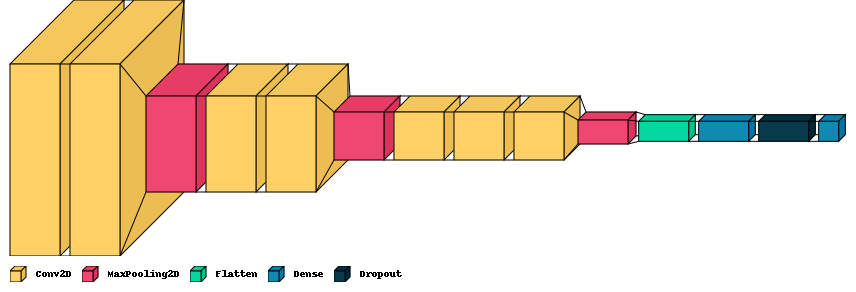

In [12]:
import visualkeras

visualkeras.layered_view(model1, legend=True, scale_xy=4, scale_z=1, max_z=50)

# Training

In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(patience=15, restore_best_weights=True)
lrp_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1)

In [16]:
import time

t_start = time.time()

hist = model1.fit(train_generator,
                  batch_size=128,
                  epochs=100,
                  validation_data = validation_generator,
                  callbacks = [lrp_reducer, early_stopping])

t_end = time.time()
reg_t_duration = t_end - t_start

Epoch 1/100
367/367 [==============================] - 48s 124ms/step - loss: 0.4265 - accuracy: 0.7906 - val_loss: 0.1848 - val_accuracy: 0.9309 - lr: 1.0000e-04
Epoch 2/100
367/367 [==============================] - 44s 121ms/step - loss: 0.2080 - accuracy: 0.9218 - val_loss: 0.1491 - val_accuracy: 0.9460 - lr: 1.0000e-04
Epoch 3/100
367/367 [==============================] - 45s 123ms/step - loss: 0.1747 - accuracy: 0.9363 - val_loss: 0.1300 - val_accuracy: 0.9538 - lr: 1.0000e-04
Epoch 4/100
367/367 [==============================] - 45s 124ms/step - loss: 0.1573 - accuracy: 0.9436 - val_loss: 0.1217 - val_accuracy: 0.9577 - lr: 1.0000e-04
Epoch 5/100
367/367 [==============================] - 46s 126ms/step - loss: 0.1496 - accuracy: 0.9467 - val_loss: 0.1103 - val_accuracy: 0.9625 - lr: 1.0000e-04
Epoch 6/100
367/367 [==============================] - 46s 124ms/step - loss: 0.1390 - accuracy: 0.9507 - val_loss: 0.1001 - val_accuracy: 0.9678 - lr: 1.0000e-04
Epoch 7/100
367/367 [=

# Validation

In [36]:
# validation
model1_score, model1_acc = model1.evaluate(test_generator)
print('Test Loss =', model1_score)
print('Test Accuracy =', model1_acc*100)

46/46 [==============================] - 3s 67ms/step - loss: 0.1033 - accuracy: 0.9622
Test Loss = 0.10334541648626328
Test Accuracy = 96.21612429618835


In [37]:
import matplotlib.pyplot as plt

# Plot metrics acc, val_acc and loss, val_loss
def plot_metrics(history, suptitle):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(history.history['loss']))

    # Plot accuracy
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='accuracy')
    plt.plot(epochs_range, val_acc, label='validation_accurancy')
    plt.legend(loc='lower right')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('accuracy and validation_accurancy')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='loss')
    plt.plot(epochs_range, val_loss, label='validation_loss')
    plt.legend(loc='upper right')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('loss and validation_loss')

    plt.suptitle(suptitle, fontsize=20)
    plt.show()
    return

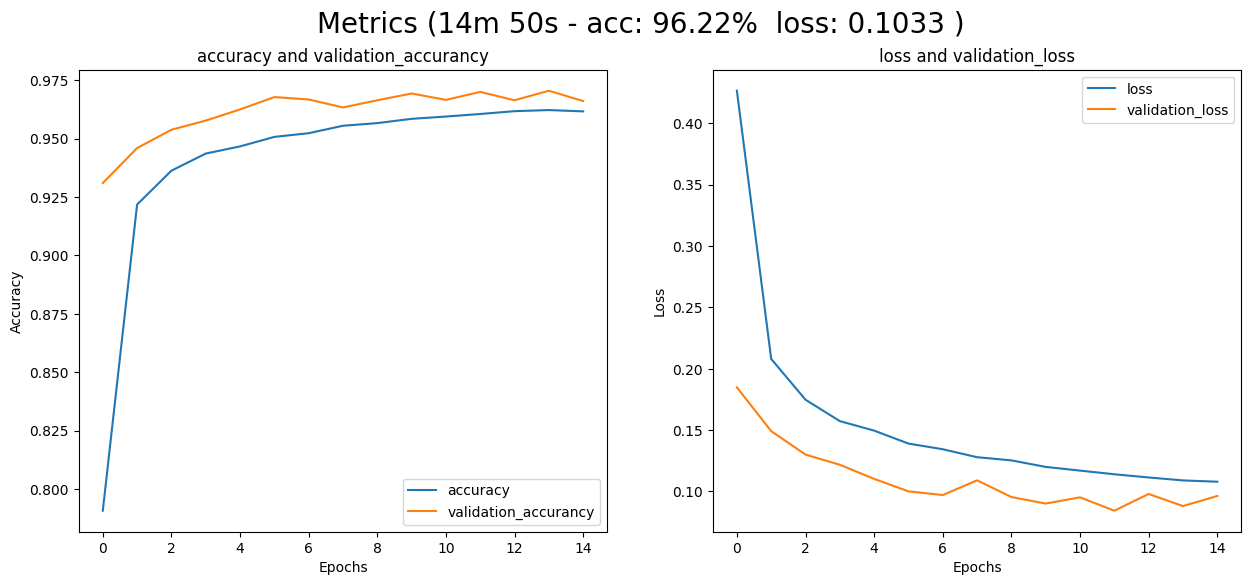

Accuracy: 96.22%
Loss:  0.10334541648626328
Epochs:  14
Train time : 14m 50s 

Batch Size: 128


In [38]:
train_time = '{:.0f}m {:.0f}s - acc: {:.2f}%  loss: {:.4f} '.format((reg_t_duration/60), (reg_t_duration%60), (model1_acc*100), model1_score)

plot_metrics(hist, ('Metrics ('+ train_time+')'))

print('================================================')
print("Accuracy: %.2f%%" % (model1_acc * 100))
print("Loss:  %s" % model1_score)
print("Epochs:  %d" % max(range(len(hist.history['loss']))))
print("Train time : %0.0fm %0.0fs \n" % (reg_t_duration/60, reg_t_duration%60))
print("Batch Size: %s" % batch_size)

In [39]:
predictions = model1.predict(test_generator)

46/46 [==============================] - 3s 70ms/step


In [40]:
import numpy as np

predictions = np.argmax(predictions, axis=1)

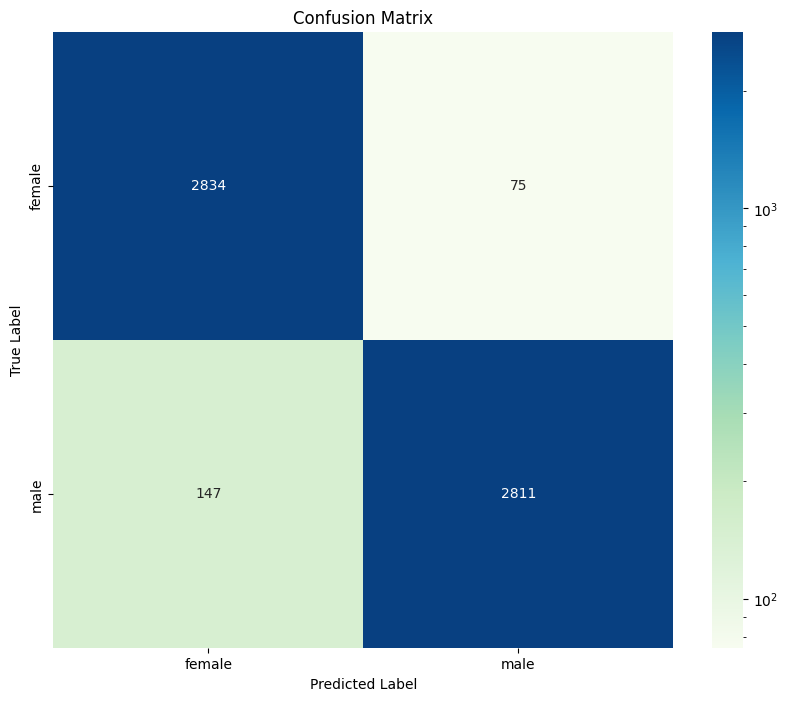

In [41]:
from sklearn.metrics import confusion_matrix
from matplotlib.colors import LogNorm
import seaborn as sns

true_labels = test_generator.classes
conf_matrix = confusion_matrix(true_labels, predictions)
label_to_text = ['female', 'male']

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='GnBu', fmt='g', xticklabels=[label_to_text[i] for i in range(len(conf_matrix))], yticklabels=[label_to_text[i] for i in range(len(conf_matrix))], norm=LogNorm())

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

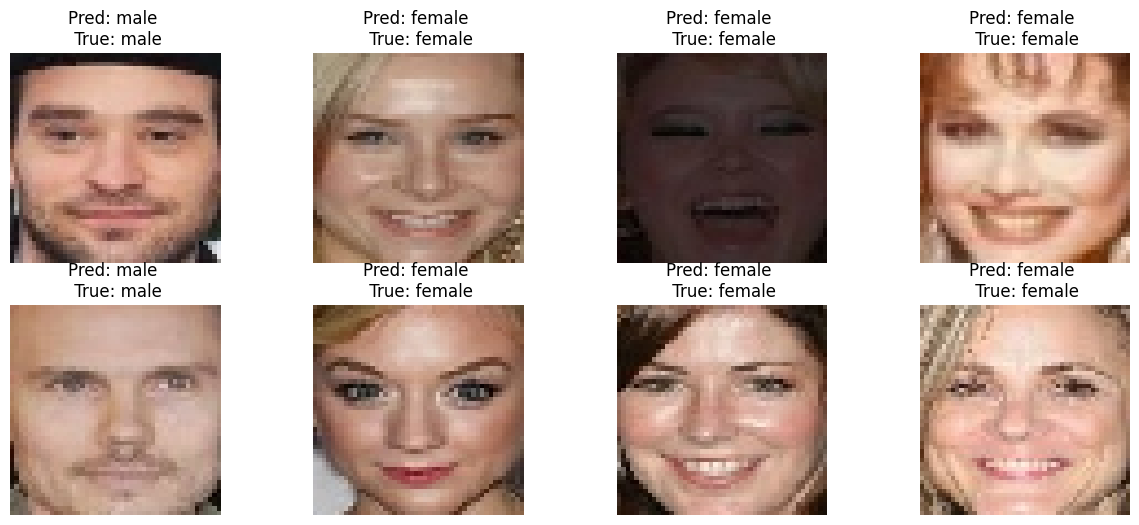

In [46]:
from tensorflow.keras.preprocessing import image

num_examples = 8
correct_indices = np.where(predictions == true_labels)[0]
correct_indices_sample = np.random.choice(correct_indices, num_examples, replace=False)

plt.figure(figsize=(15, 6))
num_rows = 2
num_cols = 4
for i, idx in enumerate(correct_indices_sample):
    img_path = test_generator.filepaths[idx]
    img = image.load_img(img_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(img)
    plt.title(f'Pred: {label_to_text[predictions[idx]]} \n True: {label_to_text[true_labels[idx]]}')
    plt.axis('off')
plt.show()

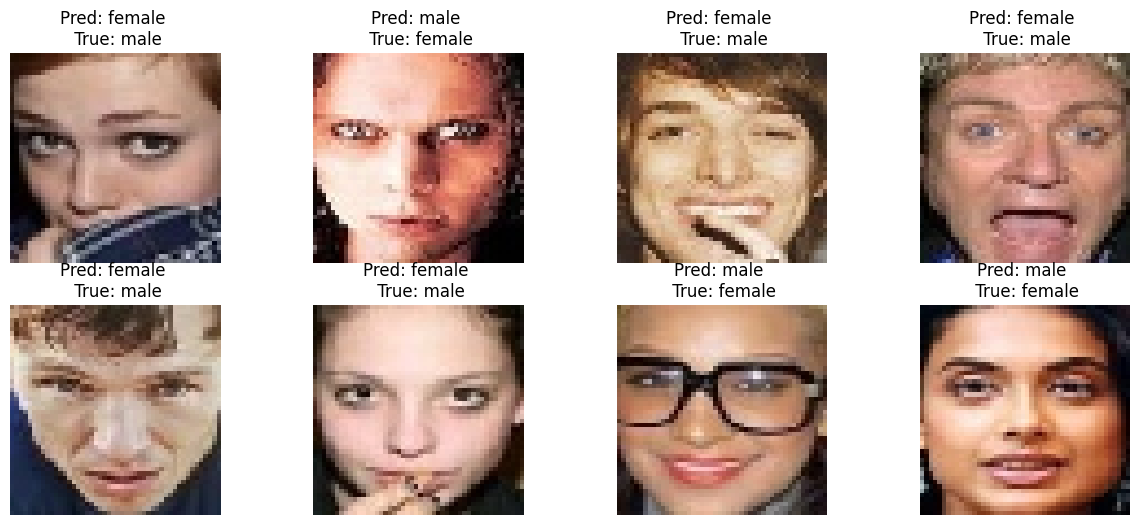

In [48]:
from tensorflow.keras.preprocessing import image

num_examples = 8
incorrect_indices = np.where(predictions != true_labels)[0]
incorrect_indices_sample = np.random.choice(incorrect_indices, num_examples, replace=False)

plt.figure(figsize=(15, 6))
num_rows = 2
num_cols = 4
for i, idx in enumerate(incorrect_indices_sample):
    img_path = test_generator.filepaths[idx]
    img = image.load_img(img_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(img)
    plt.title(f'Pred: {label_to_text[predictions[idx]]} \n True: {label_to_text[true_labels[idx]]}')
    plt.axis('off')
plt.show()

In [49]:
# f1-score
from sklearn.metrics import f1_score
f1 = f1_score(true_labels, predictions, average='weighted')

print("F1-Score:", f1)

F1-Score: 0.9621594204180924
